# Project: No-Show Appointments

## Table of Contents

- [Introduction](#intro)
- [Data Wrangling](#wrangling)
    - [General Properties](#General-Properties)
        - [Null Values, Columns & Associated Datatypes](#null-values)
        - [Duplicates](#Duplicates)
        - [Number of Patients](#patients-num)
    - [Errors](#Errors)
    - [Data Cleaning](#cleaning)
        - [Negative Age Values](#negative-age)
        - [Rename Columns](#rename-cols)
- [Exploratory Data Analysis](#eda)
    - [What is The Age Distribution of Patients?](#age-distribution)
    - [What is The Behaviour of Patients To Appointments?](#behaviour)
    - [How Many Patients Have A Health Program Benefit?](#health-program-benefits)
    - [Does Having The Benefit of A Health Program Affect Patients Response  Towards Appointments?](#health-response)
        - [How Often Do Enrolled Patients Show Up For Their Appointments?](#enrolled-response)
        - [How Often Do *Non Enrolled Patients* Show Up For Their Appointments?](#not-enrolled-response)
    - [How Does Hypertension Affect Patients' Response?](#hypertension)
        - [How Many Patients Have Hypertension?](#hypertensive-num)
        - [What Proportion Of Hypertensive Patients Show Up For Appointments?](#hypertensive-prop)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

I shall be analysing a dataset of medical appointments in Brazil. I shall be looking into several factors/variables that may be responsible for whether patients show up for their appointments with the medical center or not.

To begin, I shall `import` and configure the required packages and datasets for the analysis.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

I will be using [this dataset](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv) (Original source [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments))

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
appointments.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


Looking at the **`appointments`** dataframe, I can see that 8 of the columns hold values for which there are only two possible outcomes. They are:
- Gender (M | F)
- Scholarship (0 | 1; _correspondiing to No/Yes or False/True_)
- Hipertension (0 | 1) **Note: Correct spelling is *Hypertension***
- Diabetes (0 | 1)
- Alcoholism (0 | 1)
- Handcap (0 | 1) **Correct spelling: *Handicap***
- SMS_received (0 | 1)
- No-show (No | Yes) - Another case of **No** means **Yes**, i.e., *A **`No-Show`** value of **No** actually means that the patient showed up*.

Other columns in the dataframe are:
- PatientId - A unique number to represent each patient.
- AppointmentID - A unique number to represent each appointment.
- Age - The patients age.
- Neighbourhood - The location where the health care center is located.
- ScheduledDay - The date set for the patient to meet their healthcare consultant.
- AppointmentDay - The date an appointment was made/registered.

<a id="null-values"></a>
#### Null Values, Columns & Associated Datatypes

I want to investigate the dataset for missing or null values.

In [3]:
# Check the shape of appointmens dataframe
# also check for null values for columns in the dataframe
# and the datatypes of each column
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# verify the number of null values in the dataframe
appointments.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [5]:
appointments

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


I can see that there are **110527** rows and also **14** columns in the dataframe. There are also no null values.

No row/column has a **Null** value.

From the result of the above cell, the **`PatientId`** column should have an `int` datatype.

Also, two columns which denote dates(**`ScheduledDay`** & **`AppointmentDay`**) should be a `datetime` datatpe so I will change their datatypes from `str` (or `object` as seen above) to `datetime`.

#### Duplicates

Let's see if there are any duplicated rows.

In [6]:
# check for duplicated rows
appointments.duplicated().any()

False

There are no duplicated rows in this dataframe. That is, all rows are distinct.

<a id="patients-num"></a>
#### Number of patients

Let's see the total number of patients.

In [7]:
# carry out a quick summary statistics of appointments
appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The summary table shows that:
- There are 110527 appointments
- The youngest patient is **-1** years old. That means patient from the future can make an appointment. *However, in reality, this is an error.*
- The oldest patient is **115** years old.
- About **9.8%** of the appointments are sponsored by a health program.
- About **19.7%** of the appointments are with hypertensive patients.
- About **7.1%** of the appointments are with diabetic patients.
- About **3%** of the appointments are related to an alcoholic addiction.
- About **2.2%** of the appointments are with patients who have a disability.
- The **`Handcap`** column has a maximum value of 4. That means there might be other values than the expected values **0** and **1**. 
- Only about **32.1%** SMS notifications or reminders are sent.

In [8]:
# how many distinct values are in the Handcap column
appointments['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

The values above shows that there are four unique **`Handicap`** values. But ther is no further information as to what each of the above values represent.

In [9]:
# count unique patients in the dataset
appointments.PatientId.nunique()

62299

There are only **62299** distinct patients. That means many patients have more than one or several appointments.

### Errors

From the above summary, I can see that there is a negative **Age** value which is **impossible**. I want to check which row has this data.

There may also be zero values which unlike negative **Age** values, make sense as these **may** be baby patients.

<a id="cleaning"></a>
### Data Cleaning

In this section, I will refine or modify the dataset so as to have an almost accurate anallysis. I will remove some incorrect values whose correct values are I can't know inituitively. Also, I will add values whose correct values can be intuitively inferred. I'll also change some column names.

Some of these values include the value of **-1** in the **`Age`** column. Although, I'm aware that this is a data entry error, it can affect the accuracy of my analysis as it means mathematically that these are patients who don't yet exist.

Also, some column names are either wrongly spelled or look counter intuitive. So, I'll rename these columns [here](#rename-cols).

<a id="negative-age"></a>
#### Negative Age Values
First, I'll check the numbe of negative ages in the dataframe

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
negative_age = appointments.query('Age < 0')
negative_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
appointments[appointments.PatientId == negative_age.iloc[0].PatientId]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


This patient has only one appointment in this dataset.

So, I will first check to see if this patient had other appointments so that I can useverify the correct **Age** from the other appointments.

Since there is no other value to verify  I'll drop the row with an Age value of **-1** from the dataframe.

In [12]:
# drop the record for patient with a negative age
appointments.drop(negative_age.index, inplace=True)

In [13]:
# verify that there are no more negative age entries
appointments.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


<a id="rename-cols"></a>
#### Rename Columns
Also, I want to rename some columns with either wrong spellings (**`Hipertension`** & **`Handcap`**), unintuitive casings (**`PatientId`**) or error prone symbols (**`No-show`**).

In [14]:
# define new column names
cols_to_rename = {
    "PatientId": "PatientID",
    "Scholarship": "Health_program",
    "Hipertension": "Hypertension",
    "No-show": "No_show",
    "Handcap": "Handicap",
    "SMS_received": "Notified"
}

# rename the columns
appointments.rename(columns=cols_to_rename, inplace=True)

appointments.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Health_program,Hypertension,Diabetes,Alcoholism,Handicap,Notified,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


I also want to change the datatype of the **`PatientID`** column to **`int64`**.

In [15]:
# change the PatientID to 'int64' datatype
appointments.PatientID = appointments.PatientID.astype('int64')

I don't have further information regarding the nature of patients' disabilities. Therefore, I will assume that **`Handicap`** values other than 0 means that the patient has at least one form of handicap. Thus, I will use **0** to indicate that the patient isn't handicapped if the initial value is **0** and **1** to indicate that the patient is hancicapped for values other than **0**

In [16]:
# define function that assigns 0 or 1, depending on the initial value
check_handicap = lambda x: 1 if x != 0 else x

appointments.Handicap = appointments.Handicap.apply(check_handicap)

I will now change the **`ScheduledDay`** and **`AppointmentDay`** columns datatypes to datetime. I won't be using the time because the time values in **`AppointmentDay`** are constant. So I'll slice off that part. Then, I can proceed to change the datatpes to datetime.

In [17]:
# define function for slicing the time from the given values
reformat_date = lambda x: x[:10]

# apply the slicing function to the datetime columns
appointments.ScheduledDay = appointments.ScheduledDay.apply(reformat_date)
appointments.AppointmentDay = appointments.AppointmentDay.apply(reformat_date)

appointments.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Health_program,Hypertension,Diabetes,Alcoholism,Handicap,Notified,No_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Now that the time values are sliced, I will convert the new values to datetime.

In [18]:
# change the columns datatypes to datetime
appointments.ScheduledDay = pd.to_datetime(appointments.ScheduledDay)
appointments.AppointmentDay = pd.to_datetime(appointments.AppointmentDay)

# verify the changes made
appointments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientID       110526 non-null  int64         
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  object        
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  int64         
 6   Neighbourhood   110526 non-null  object        
 7   Health_program  110526 non-null  int64         
 8   Hypertension    110526 non-null  int64         
 9   Diabetes        110526 non-null  int64         
 10  Alcoholism      110526 non-null  int64         
 11  Handicap        110526 non-null  int64         
 12  Notified        110526 non-null  int64         
 13  No_show         110526 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

As seen int the info about the `appointments` dataframe, **`PatientID`** is now an **`int64`** datatype while **`ScheduledDay`** and **`AppointmentDay`** are now `datetime` datatypes.

<a id='eda'></a>
## Exploratory Data Analysis

Now, I will analyse the data to see how how I can relate the given variables to the possibility of patients showing up for appointments.

<a id="age-distribution"></a>
### What is The Age Distribution of Patients?

In [19]:
# get the top 10 ages population
appointments.Age.value_counts().head(10)

0     3539
1     2273
52    1746
49    1652
53    1651
56    1635
38    1629
59    1624
2     1618
50    1613
Name: Age, dtype: int64

There are more appointments for babies (ages 0 - 2) as seen in the above cell showing the top 10 patients ages. People in their late 40s to late 50s are also very likely to have an appointment.

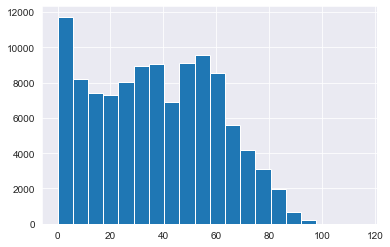

In [20]:
# What is the age distribution in the dataframe
appointments.Age.hist(bins=20);

From the above histogram, I can see that there are three peaks. The first peak is between the infancy ages (0 - 10). The lowest peak is between the twenties and 40 (the peak height is almost similar to the peak for older ages). The last peak is between ages of around 45 or 50 to age 60. Then, there is a decline in medical appoinments for older ages.

<a id="behaviour"></a>
### What is The Behaviour of Patients To Appointments?

In [21]:
# What is the number of patients that showed up for appointments
#  against  the number of those that didn't
print(appointments.No_show.value_counts())
show_proportion = appointments.No_show.value_counts(normalize=True)
show_proportion

No     88207
Yes    22319
Name: No_show, dtype: int64


No     0.798066
Yes    0.201934
Name: No_show, dtype: float64

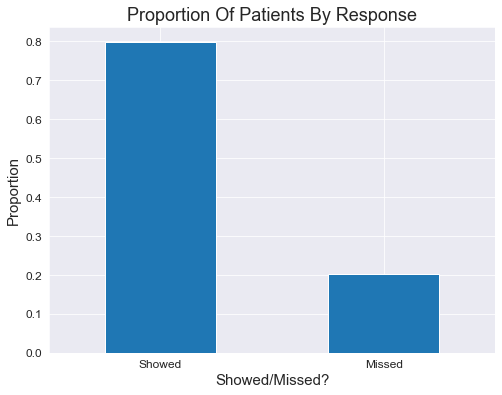

In [22]:
# plot proportion of patients responses
show_proportion.plot(kind='bar', figsize=(8, 6), fontsize=12)
plt.title('Proportion Of Patients By Response', fontsize=18)
plt.xlabel('Showed/Missed?', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.xticks([0, 1], ['Showed', 'Missed'], rotation=0);

Approximately **80%** of patients show up for appointments

<a id="health-program-benefits"></a>
### How Many Patients Have A Health Program Benefit?
I want to see how the ratio of patients in the **`Health_program`** category.

In [23]:
print(appointments.Health_program.value_counts())

program_proportion = appointments.Health_program.value_counts(normalize=True)
program_proportion

0    99665
1    10861
Name: Health_program, dtype: int64


0    0.901734
1    0.098266
Name: Health_program, dtype: float64

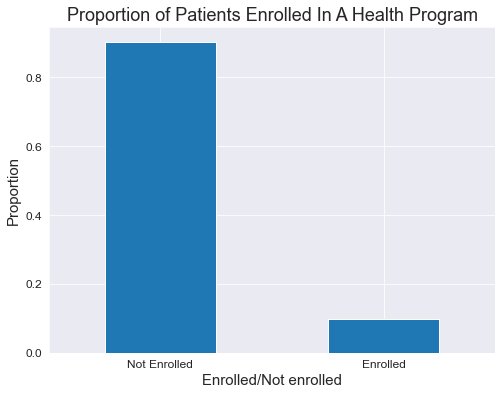

In [24]:
program_proportion.plot(kind='bar', figsize=(8, 6), fontsize=12)
plt.title("Proportion of Patients Enrolled In A Health Program", fontsize=18)
plt.xlabel('Enrolled/Not enrolled', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.xticks([0, 1], ['Not Enrolled', 'Enrolled'], rotation=0);

About **90%** of patients are not enrolled on a healthcare program, only approximately **10%** are enrolled.

<a id="health-response"></a>
### Does Having The Benefit of A Health Program Affect Patients Response  Towards Appointments?

<a id="enrolled-response"></a>
#### How Often Do Enrolled Patients Show Up For Their Appointments?

In [25]:
# subset patients that are (and are not) enrolled with an healthcare program
enrolled = appointments.query('Health_program == 1')
not_enrolled = appointments.query('Health_program != 1')

In [26]:
# see the number of enrolled patients
print(enrolled.No_show.value_counts())

# get the proportion of patients enrolled in health programs
enrolled_show_proportion = enrolled.No_show.value_counts(normalize=True)
enrolled_show_proportion

No     8283
Yes    2578
Name: No_show, dtype: int64


No     0.762637
Yes    0.237363
Name: No_show, dtype: float64

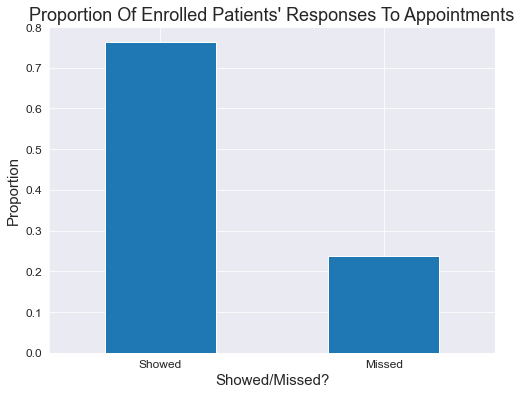

In [27]:
# plot the response difference
enrolled_show_proportion.plot(kind='bar', figsize=(8,6), fontsize=12)
plt.title("Proportion Of Enrolled Patients' Responses To Appointments", fontsize=18)
plt.xlabel('Showed/Missed?', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.xticks([0, 1], ['Showed', 'Missed'], rotation=0);

About **76%** of patients who are enrolled into a health program. About **24%** miss their appointments.

<a id="not-enrolled-response"></a>
#### How Often Do *Non Enrolled Patients* Show Up For Their Appointments?

In [28]:
# get the proporton of non enrolled patients response
print(not_enrolled.No_show.value_counts())
not_enrolled_show_proportion = not_enrolled.No_show.value_counts(normalize=True)
not_enrolled_show_proportion

No     79924
Yes    19741
Name: No_show, dtype: int64


No     0.801926
Yes    0.198074
Name: No_show, dtype: float64

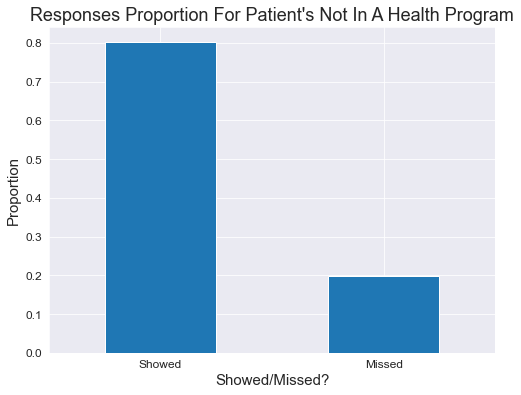

In [29]:
# plot the difference in responses
not_enrolled_show_proportion.plot(kind='bar', figsize=(8, 6), fontsize=12)
plt.title("Responses Proportion For Patient's Not In A Health Program", fontsize=18)
plt.xlabel('Showed/Missed?', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.xticks([0, 1], ['Showed', 'Missed'], rotation=0);

About **80%** of patients not enrolled in a health program show up for their appointments. This is **4%** more than the responses patients whose appointments bills have somewhat been settled.

Let us now compare bth groups side by side.

In [30]:
# x-location of the bars
ind = np.array([0, 1])

# bar width
width = 0.25

# define x-tick labels
locations = ind + width/2
labels = ["Showed", "Missed"]

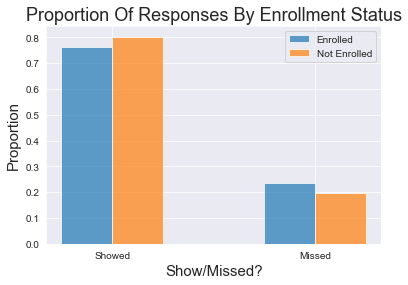

In [31]:
# plot the response bars
plt.bar(ind, enrolled_show_proportion, width, label='Enrolled', alpha=0.7)
plt.bar(ind+width, not_enrolled_show_proportion, width, label='Not Enrolled', alpha=0.7)

# title tick and axes labels
plt.xlabel("Show/Missed?", fontsize=15)
plt.ylabel("Proportion", fontsize=15)
plt.title("Proportion Of Responses By Enrollment Status", fontsize=18)
plt.xticks(locations, labels)

# legeng for the chart
plt.legend();

As seen in the bar chart above, people who don't have a health program benefit show up more for appointments.

<a id="hypertension"></a>
### How Does Hypertension Affect Patients' Response?

I want to analyse if a critical healh condition such as **Hypertension** can influence whether a patient shoe up for appoinments or not.

<a id="hypertensive-num"></a>
#### How Many Patients Have Hypertension?

In [32]:
# print the count of hypertensive and non hypertensive patients
print(appointments.Hypertension.value_counts())

# print the proportion hypertensive and non hypertensive patients
hytension_proportion = appointments.Hypertension.value_counts(normalize=True)
hytension_proportion

0    88725
1    21801
Name: Hypertension, dtype: int64


0    0.802752
1    0.197248
Name: Hypertension, dtype: float64

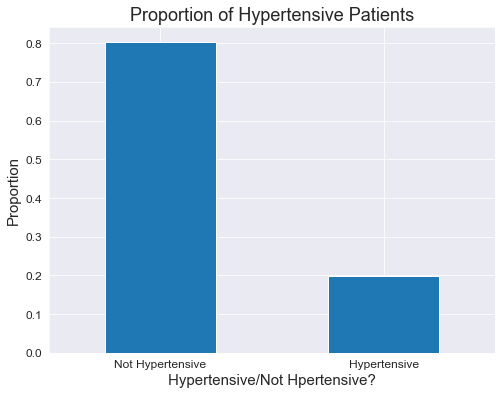

In [33]:
hytension_proportion.plot(kind='bar', figsize=(8, 6), fontsize=12)
plt.title("Proportion of Hypertensive Patients", fontsize=18)
plt.xlabel('Hypertensive/Not Hpertensive?', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.xticks([0, 1], ['Not Hypertensive', 'Hypertensive'], rotation=0);

As seen from the results and chart above, about **80%** of patients have hypertension while about **20%** are not hypertensive.

Next, we'll investigate the proportions of these groups that show up for appointments

In [34]:
# get the subsets of hypertensive and non hypertensive patients
hypertensive = appointments.query('Hypertension == 1')
not_hypertensive = appointments.query('Hypertension != 1')

<a id="hypertensive-prop"></a>
#### What Proportion Of Hypertensive Patients Show Up For Appointments?

In [35]:
# print hypertensive count that show up for appointments
print(hypertensive.No_show.value_counts())

# print hypertensive proportion that show up for appointments
hytensive_show_prop = hypertensive.No_show.value_counts(normalize=True)
hytensive_show_prop

No     18029
Yes     3772
Name: No_show, dtype: int64


No     0.82698
Yes    0.17302
Name: No_show, dtype: float64

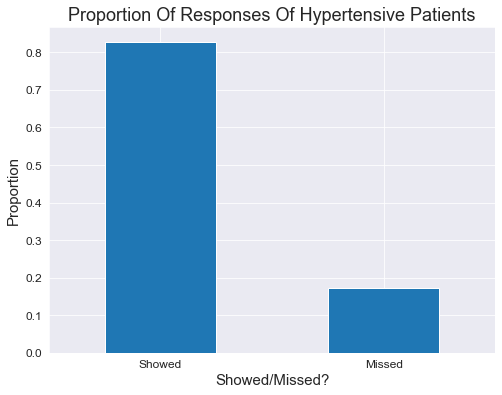

In [36]:
# plot the response difference for hypertensive patients
hytensive_show_prop.plot(kind='bar', figsize=(8,6), fontsize=12)
plt.title("Proportion Of Responses Of Hypertensive Patients", fontsize=18)
plt.xlabel('Showed/Missed?', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.xticks([0, 1], ['Showed', 'Missed'], rotation=0);

About **83%** of hypertensive patients show up for appointments. **17%** of hypertensive patients don't.

In [37]:
# print count of non hypertensive patients that show up for appointments
print(not_hypertensive.No_show.value_counts())

# print proportion of non hypertensive patients that show up for appointments
no_hytensive_show_prop = not_hypertensive.No_show.value_counts(normalize=True)
no_hytensive_show_prop

No     70178
Yes    18547
Name: No_show, dtype: int64


No     0.790961
Yes    0.209039
Name: No_show, dtype: float64

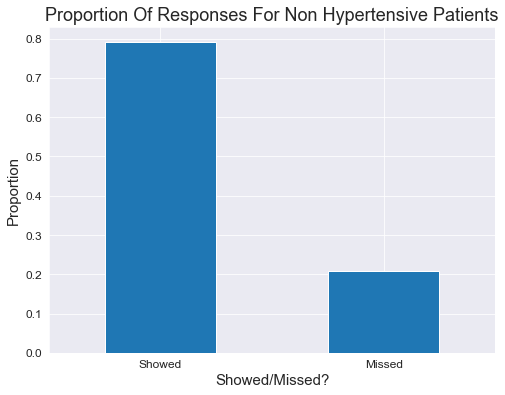

In [38]:
# plot the response difference
no_hytensive_show_prop.plot(kind='bar', figsize=(8,6), fontsize=12)
plt.title("Proportion Of Responses For Non Hypertensive Patients", fontsize=18)
plt.xlabel('Showed/Missed?', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.xticks([0, 1], ['Showed', 'Missed'], rotation=0);

About **80%** of non hypertensive patients show up for appointments while about **20%** don't.

Let's compare both groups(*hypertensive* & *non hypertensive*)

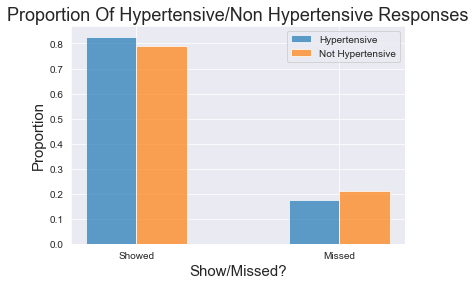

In [39]:
# plot the response bars
plt.bar(ind, hytensive_show_prop, width, label='Hypertensive', alpha=0.7)
plt.bar(ind+width, no_hytensive_show_prop, width, label='Not Hypertensive', alpha=0.7)

# title tick and axes labels
plt.xlabel("Show/Missed?", fontsize=15)
plt.ylabel("Proportion", fontsize=15)
plt.title("Proportion Of Hypertensive/Non Hypertensive Responses", fontsize=18)
plt.xticks(locations, labels)

# legeng for the chart
plt.legend();

More proportion of hypertensive patients show up than non hypertensive patients for appointments.

<a id='conclusions'></a>
## Conclusions

From the analysis,I was able to come to the folloiwng conclusions.
- More proportion of patients who are not enrolled in a health program show up for appointments than those who are enrolled.
- More non hypertensive patients show up for appointments than hypertensive patients.
- However, for the both groups of the variables I selected for the analysis (based on hypertension and whether patients are enrolled in a health program), there isn't much difference between opposite proportions of patients in each selected groups that show up for appointments.
- Thus, being in a health program or having hypertension does not really affect patients response to appointments.

**NOTE**: This analysis is limited aas it does not utilise any inferential technique.